<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%209%20Dry-Gas%20Reservoirs/notebook/9_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 9. Dry-Gas Reservoirs**

In [1]:
!git clone https://github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 1004 (delta 48), reused 0 (delta 0), pack-reused 909
Receiving objects: 100% (1004/1004), 12.47 MiB | 12.90 MiB/s, done.
Resolving deltas: 100% (443/443), done.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

## Problem 9.1

No information on gas production (Gp)? Answers recovery factor (Fr) incorrect? Correct answer from book, Fr under waterdrive condition is 0.65?

In [3]:
# Task 1. calculate OGIP in scf and recovery factor (volumetric)

# knowns: reservois is volumetric
zi = 0.8 # initial gas compressibility gas
pi = 3000 # initial pressure, psia
pa = 500 # psia
za = 0.96
sw = 0.3
temp = 200 # fahrenheit
poro = 0.25
bulkvol = 20000 # acre-ft
sgr = 0.25 # residual gas saturation to waterflood

"Calculate Bg and Bgi"
Bgi = 0.0282793 * zi * (temp + 460) / pi 
Bg = 0.0282793 * za * (temp + 460) / pa # convert fahrenheit to reamur

"Calculate Fr volumetric"
Fr_vol = 1 - Bgi / Bg
print('Recovery Factor under volumetric assumption:', Fr_vol)

"Calculate Fr with waterdrive"
Fr_water = 1 - ((sgr * Bgi) / (Bg * (1 - sw)))
print('Recovery Factor under waterdrive assumption:', Fr_water)

Recovery Factor under volumetric assumption: 0.861111111111111
Recovery Factor under waterdrive assumption: 0.9503968253968254


## Problem 9.2

### Task 1

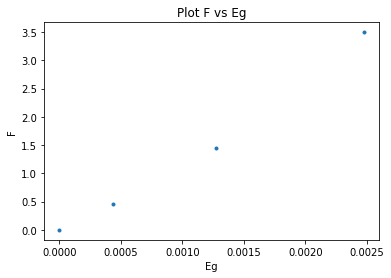

In [4]:
# Task 1. calculate OGIP (volumetric, compressibility=0)

# known
p = np.array([3200, 2925, 2525, 2125])
Gp = np.array([0, 79, 221, 452])
Bg = np.array([52622, 57004, 65311, 77360]) * 1E-7

pi = 3200 # initial pressure, psia
temp = 220 # fahrenheit

F = Gp * Bg
Eg = Bg - Bg[0]

plt.plot(Eg, F, '.')
plt.title('Plot F vs Eg')
plt.xlabel('Eg'); plt.ylabel('F')
plt.show()

OGIP at the end of each interval

In [5]:
interval = np.array([1,2,3,4])

for i in range(len(F)):
  ogip = (F[i] / Eg[i]) * 1E-03
  print('OGIP at interval {} is {} Bscf'.format(interval[i], ogip))

OGIP at interval 1 is nan Bscf
OGIP at interval 2 is 1.027685075308079 Bscf
OGIP at interval 3 is 1.137499487745291 Bscf
OGIP at interval 4 is 1.4134820923275933 Bscf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


### Task 2

Prove why from the plot indicates waterdrive?

The plot curves upward. Suppose we take the first 2 points of the plot, take regression, and show the curving upward.

In [0]:
def linear(x, a, b):
  # a: slope
  # b: intercept
  y = a * x + b
  return(y)

In [7]:
Eg[:2]

array([0.       , 0.0004382])

Calculated OGIP: 1027.685075308079


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


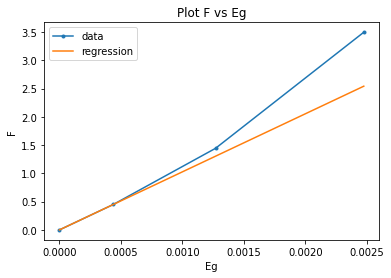

In [8]:
popt, pcov = curve_fit(linear, Eg[:2], F[:2])
print('Calculated OGIP:', popt[0])

# regression line
y = popt[0] * Eg + popt[1]

plt.plot(Eg, F, '.-', label='data')
plt.plot(Eg, y, label='regression')
plt.title('Plot F vs Eg')
plt.xlabel('Eg'); plt.ylabel('F')
plt.legend()
plt.show()

### Task 3 

Plot $F/E_g$ vs $t$ , prove the existence of waterdrive

Plot is curving upward, $F/E_g$ increases means OGIP "apparently" increases. This appearance may indicate waterdrive.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


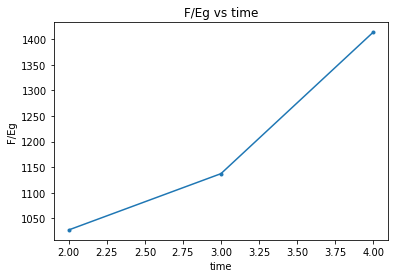

In [9]:
plt.plot(interval, F/Eg, '.-')
plt.title('F/Eg vs time')
plt.xlabel('time'); plt.ylabel('F/Eg')
plt.show()

### Task 4


Calculate water encroachment $(W_e)$, known that OGIP from volumetric study is 1.018 Bscf.

$$W_e=B_wW_p+F-G_{fgi}E_g-G_{fgi}B_{gi}E_{fw}$$

Can't be answered because there's no info about water production $W_p$ and water FVF $B_w$

## Problem 9.3

### Task 1

Use Plot 9.1 to determine apparent gas in place

My answer is 253 Bscf, book's answer is 239 Bscf. Difference is 14 Bscf, pretty large!!!

In [10]:
# Task 1. use Plot 9.1 to determine apparent gas in place

temp = 122 # fahrenheit
swi = 0.25
cf = 3E-6 # psi^-1
cw = 3.3E-6 # psi^-1

columns = ['date', 'p', 'p/z', 'Gp', 'Wp', 'z', 'Bg']
data = pd.read_csv('/content/reservoir-engineering/Unit 9 Dry-Gas Reservoirs/data/Table 9.11-Reservoir and Production Data for Problem 9.3.csv', names=columns)

data['date'] =  pd.to_datetime(data['date'], format='%d %B %Y') # format check web: https://strftime.org/
# data.head(10)
data

,date,p,p/z,Gp,Wp,z,Bg
0,1964-12-01,2039.0,2326.0,0.0,0.0,0.876612,0.007074
1,1964-12-10,2026.0,2311.0,4.0,0.0,0.876677,0.007120
2,1965-03-26,2031.0,2316.0,7.0,0.0,0.876943,0.007104
3,1967-01-25,2021.0,2304.0,258.0,0.0,0.877170,0.007141
4,1967-05-12,2021.0,2304.0,265.0,0.0,0.877170,0.007141
5,1967-05-29,2031.0,2316.0,267.0,0.0,0.876943,0.007104
6,1968-08-19,1982.0,2259.0,4767.0,0.0,0.877379,0.007284
7,1968-08-20,1984.0,2261.0,4767.0,0.0,0.877488,0.007277
8,1968-09-06,1988.0,2265.0,4786.0,0.0,0.877704,0.007264
9,1969-01-17,1991.0,2270.0,6886.0,0.0,0.877093,0.007248


(0.0, 356.894181)

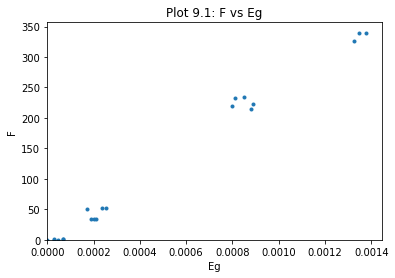

In [11]:
Gp = data['Gp'].values
Bg = data['Bg'].values

F = Gp * Bg
Eg = Bg - Bg[0]

plt.plot(Eg, F, '.')
plt.title('Plot 9.1: F vs Eg')
plt.xlabel('Eg'); plt.ylabel('F')
plt.xlim(xmin=0); plt.ylim(ymin=0)

In [0]:
def linear(x, a):
  # a: slope
  # b = 0, intercept at origin (0,0)
  y = a * x
  return(y)

Apparent Gas in Place: 253.4293146193645 Bscf


(0.0, 366.4207745424083)

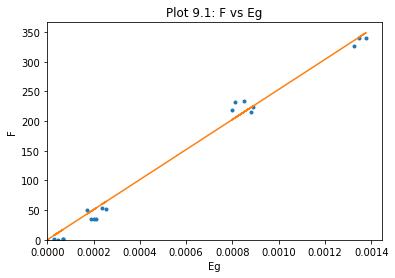

In [13]:
popt, pcov = curve_fit(linear, Eg, F)
print('Apparent Gas in Place:', popt[0] * 1E-03, 'Bscf')

y = popt[0] * Eg

plt.plot(Eg, F, '.')
plt.plot(Eg, y)
plt.title('Plot 9.1: F vs Eg')
plt.xlabel('Eg'); plt.ylabel('F')
plt.xlim(xmin=0); plt.ylim(ymin=0)

### Task 2. 

Use Plot 9.3 to show existence of waterdrive and calculate aquifer influx using material balance.

From Plot 9.3 below, the data is not horizontal. Thus, it confirms the presence of waterdrive.

Material balance for aquifer influx:

$$W_e=B_wW_p+F-G_{fgi}E_g-G_{fgi}B_{gi}E_{fw}$$

**Aquifer influx can't be answered** because of minus values: $F$ less than $G_{fgi}E_g$, so $(F-G_{fgi}E_g) < 0$ 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


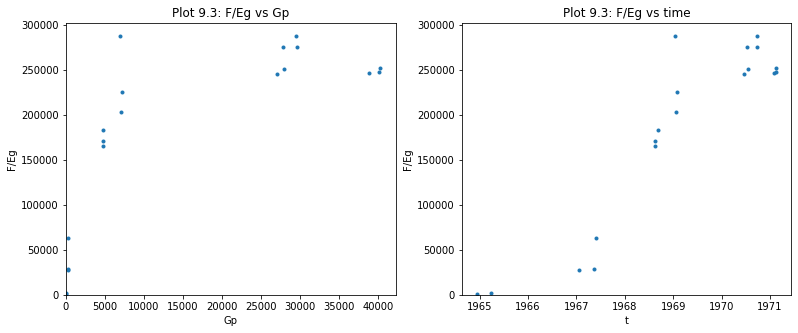

In [14]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.plot(Gp, F/Eg, '.')
plt.title('Plot 9.3: F/Eg vs Gp')
plt.xlabel('Gp'); plt.ylabel('F/Eg')
plt.xlim(xmin=0), plt.ylim(ymin=0)

plt.subplot(1,2,2)
plt.plot(data['date'], F/Eg, '.')
plt.title('Plot 9.3: F/Eg vs time')
plt.xlabel('t'); plt.ylabel('F/Eg')
plt.ylim(ymin=0)

plt.show()

In [0]:
def waterfvf(temp, p):
  "Water FVF (Bw)"
  # temp in Fahrenheit
  # p pressure in psia
  Vwp = (-1.95301E-9 * p * temp) - (1.72834E-13 * (p**2) * temp) - (3.588922E-7 * p) - (2.25341E-10 * p**2)
  Vwt = (-1E-2) + (1.33391E-2 * temp) + (5.50654E-7 * temp**2)
  Bw = (1 + Vwt) * (1 + Vwp)
  return(Bw)

In [17]:
p = data['p'].values
Wp = data['Wp'].values
Gfgi = popt[0]

"Calculate water FVF"

Bw = []
for i in range(len(p)):
  bw = waterfvf(temp, p[i])
  Bw.append(bw)

"Calculate aquifer influx"
Efw = ((cf + cw * sw) / (1 - sw)) * ((data['p'].values)[0] - (data['p'].values))
F = (Gp * 1E+06) * Bg # result in ft3
Gfgi_Eg = (Gfgi * 1E+06) * Eg # result in ft3
Gfgi_Bgi_Efw = (Gfgi * 1E+06) * Bg[0] * Efw
Bw_Wp = Bw * Wp
We = Bw_Wp + F - Gfgi_Eg - Gfgi_Bgi_Efw
We

array([        0.        , -11762111.91228784,  -7634901.24768704,
       -15321323.14998542, -15271336.14998542,  -5787861.24768704,
       -19079795.45994528, -17318721.80533306, -13907220.81072845,
         5322528.40159592, -13613253.60533707,  -7402362.40839689,
        -9775623.08165726,  15279960.43224127,  -4479431.03550462,
        25493029.93067074,  16621151.45527515, -12036417.14505811,
       -12290195.69062728,  -5040213.46682443])

## Problem 9.4

Estimate the OGIP and determine what drive mechanism

Drive mechanism from the Plots indicates volumetric (gas expansion). Both Plots curve downward, indicates water and formation compressibility plays enough important role (not negligible)

My OGIP answer is 460 Bscf, book's answer is 330 Bscf. Huge difference???

In [18]:
# Task. estimate OGIP and determine drive mech

# knowns
sw = 0.22 # water sat
cw = 3E-6 # water compressibility
cf = 19.5E-6 # formation compressibility
temp = 263 # fahrenheit
sg = 0.6 # specific gravity

columns = ['date', 'p', 'z', 'Gp', 'Bg']
data = pd.read_csv('/content/reservoir-engineering/Unit 9 Dry-Gas Reservoirs/data/Table 9.12-Reservoir Properties and Production Data for Problem 9.4.csv', names=columns)

data['date'] =  pd.to_datetime(data['date'], format='%d %B %Y') # format check web: https://strftime.org/
# data.head(10)
data

,date,p,z,Gp,Bg
0,1966-01-25,11444,1.496,0.00,0.002672
1,1967-02-01,10674,1.438,9.92,0.002753
2,1968-02-01,10131,1.397,28.62,0.002818
3,1969-06-01,9253,1.330,53.60,0.002938
4,1970-06-01,8574,1.280,77.67,0.003051
5,1971-06-01,7906,1.230,101.42,0.003180
6,1972-06-01,7380,1.192,120.36,0.003301
7,1973-09-01,6847,1.154,145.01,0.003445
8,1974-08-01,6388,1.122,160.63,0.003590
9,1975-08-01,5827,1.084,182.34,0.003802


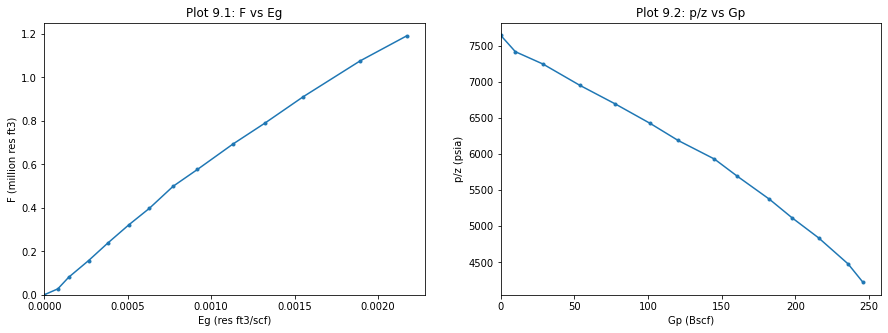

In [19]:
# Task. calculate OGIP and determine drive mechanism

pz = data['p'].values / data['z'].values
Gp = data['Gp'].values
Bg = data['Bg'].values
F = Gp * Bg
Eg = Bg - Bg[0]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(Eg, F, '.-')
plt.title('Plot 9.1: F vs Eg')
plt.xlabel('Eg (res ft3/scf)'); plt.ylabel('F (million res ft3)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.subplot(1,2,2)
plt.plot(Gp, pz, '.-')
plt.title('Plot 9.2: p/z vs Gp')
plt.xlabel('Gp (Bscf)'); plt.ylabel('p/z (psia)')
plt.xlim(xmin=0)

plt.show()

So, use Plot 9.6 and 9.7 to determine OGIP of an overpressured reservoir

In [20]:
"Compute parameters for Plot 9.6 and 9.7"

# Eg+Bgi*Efw
Efw = ((cf + cw * sw) / (1 - sw)) * ((data['p'].values)[0] - (data['p'].values))
Eg_Bgi_Efw = Eg + Bg[0] * Efw

# F/(Eg+Bgi*Efw)
F_Eg_Bgi_Efw = F / Eg_Bgi_Efw

# (p/z)*(1-Efw)
p_z_Efw = pz * (1 - Efw)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [0]:
def linear(x, a, b):
  # for Plot 9.2
  # a: slope
  # b: intercept
  y = a * x + b
  return(y)

OGIP from Plot 9.6: 461.86620028887415 Bscf
OGIP from Plot 9.7: 462.63171034068205 Bscf


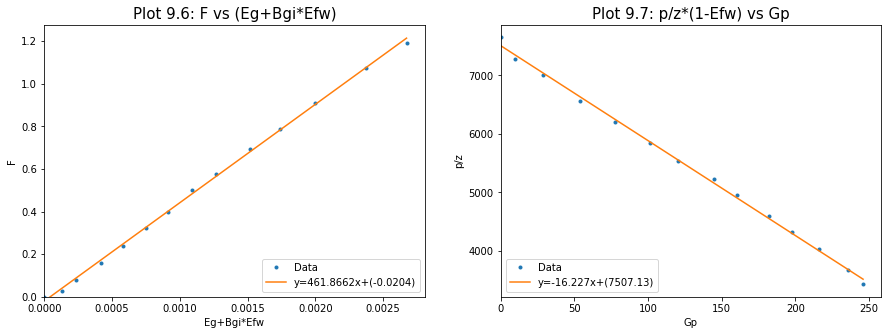

In [22]:
popt1, pcov1 = curve_fit(linear, Eg_Bgi_Efw, F)
popt2, pcov2 = curve_fit(linear, Gp, p_z_Efw)

# regression line
y1 = popt1[0] * Eg_Bgi_Efw + popt1[1]
y2 = popt2[0] * Gp + popt2[1]

ogip1 = popt1[0]
ogip2 = np.abs(popt2[1] / popt2[0])
print('OGIP from Plot 9.6:', ogip1, 'Bscf')
print('OGIP from Plot 9.7:', ogip2, 'Bscf')

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(Eg_Bgi_Efw, F, '.', label='Data')
plt.plot(Eg_Bgi_Efw, y1, label='y={}x+({})'.format(np.round(popt1[0], 4), 
                                                   np.round(popt1[1], 4)))
plt.title('Plot 9.6: F vs (Eg+Bgi*Efw)', size=15)
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.xlabel('Eg+Bgi*Efw'); plt.ylabel('F')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(data['Gp'].values, p_z_Efw, '.', label='Data')
plt.plot(data['Gp'].values, y2, label='y={}x+({})'.format(np.round(popt2[0], 4), 
                                                          np.round(popt2[1], 4)))
plt.title('Plot 9.7: p/z*(1-Efw) vs Gp', size=15)
plt.xlim(xmin=0)
plt.xlabel('Gp'); plt.ylabel('p/z')
plt.legend(loc='lower left')

plt.show()

## Problem 9.5

Task 1. Use Plot 9.1 to calculate apparent gas in place, and Plot 9.3 to confirm waterdrive

Task 2. Calculate aquifer influx amount by material balance, OGIP 1.325 Tscf

In [23]:
columns = ['months', 'p', 'F', 'Eg']
data = pd.read_csv('/content/reservoir-engineering/Unit 9 Dry-Gas Reservoirs/data/Table 9.13-Data for Problem 9.5.csv', names=columns)
data

,months,p,F,Eg
0,0,2883,0.0000,0.0
1,2,2881,5.5340,4.0
2,4,2874,24.5967,18.0
3,6,2866,51.1776,34.0
4,8,2857,76.9426,52.0
5,10,2849,103.3184,68.0
6,12,2841,131.5371,85.0
7,14,2826,180.0178,116.5
8,16,2808,240.7764,154.5
9,18,2794,291.3014,185.5
